<a href="https://colab.research.google.com/github/danosaku/classificacao_artigos_webofscience_mineracao_texto/blob/main/Pre_processamento_TCC_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import os
import nltk
import glob
from nltk.stem.porter import *
from nltk.stem import RSLPStemmer, PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
!apt install build-essential libpoppler-cpp-dev pkg-config python3-dev poppler-utils
import pandas as pd
import numpy as np

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu4).
python3-dev is already the newest version (3.8.2-0ubuntu2).
python3-dev set to manually installed.
build-essential is already the newest version (12.8ubuntu1.1).
The following additional packages will be installed:
  libpoppler-cpp0v5
The following NEW packages will be installed:
  libpoppler-cpp-dev libpoppler-cpp0v5 poppler-utils
0 upgraded, 3 newly installed, 0 to remove and 13 not upgraded.
Need to get 220 kB of archives.
After this operation, 977 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libpoppler-cpp0v5 amd64 0.86.1-0ubuntu1.1 [35.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libpoppler-cpp-dev amd64 0.86.1-0ubuntu1.1 [10.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 poppler-utils amd64 0.86.1-0ubuntu1.1 [174 kB]
Fe

In [ ]:
nltk.download('punkt') # punctuation
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

Download e descompactação da planilha

In [ ]:
#link do arquivo no Google Drive
#https://drive.google.com/file/d/1kFSj_Lb2XxHT1A_YO_YDRaAFtjEKTps3/view?usp=share_link

#import os
#if os.path.isfile('Busca\ final\ 2_expressao\ simplificada.xls'):
!gdown 1xDNirOca4fKFQEp1X3kDwif2lx7P6Snk
!unzip Dados_webofscience.zip




Downloading...
From: https://drive.google.com/uc?id=1xDNirOca4fKFQEp1X3kDwif2lx7P6Snk
To: /content/Dados_webofscience.zip
100% 1.36M/1.36M [00:00<00:00, 129MB/s]
Archive:  Dados_webofscience.zip
  inflating: Busca final 2_expressao simplificada.xls  


Abrir planilha como um dataframe


In [ ]:
dados = pd.read_excel ('Busca final 2_expressao simplificada.xls')
display(dados)


#!rm Busca\ final\ 2_expressao\ simplificada.xls

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,UT (Unique WOS ID),Web of Science Record,CLASS,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79
0,J,"Bertol, I; Gobbi, E; Barbosa, FT; Paz-Ferreiro...",NaN,NaN,NaN,"Bertol, Ildegardis; Gobbi, Ederson; Barbosa, F...",NaN,NaN,WATER EROSION IN NATURAL GRASSLAND UNDER DIFFE...,REVISTA BRASILEIRA DE CIENCIA DO SOLO,...,WOS:000295854500036,View Full Record in Web of Science,1,NaN,NaN,NaN,NaN,NaN,NaN,OBS: 0 = não se aplica; 1 = se aplica
1,J,"Xu, S; Silveira, ML; Sollenberger, LE; Viegas,...",NaN,NaN,NaN,"Xu, S.; Silveira, M. L.; Sollenberger, L. E.; ...",NaN,NaN,Conversion of native rangelands into cultivate...,JOURNAL OF SOIL AND WATER CONSERVATION,...,WOS:000427469900010,View Full Record in Web of Science,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,J,"Lanzanova, ME; Eltz, FLF; Nicoloso, RD; Cassol...",NaN,NaN,NaN,"Lanzanova, Mastrangello Enivar; Foletto Eltz, ...",NaN,NaN,RESIDUAL EFFECT OF SOIL TILLAGE ON WATER EROSI...,REVISTA BRASILEIRA DE CIENCIA DO SOLO,...,WOS:000331652000025,View Full Record in Web of Science,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,J,"Freitas, MASR; Andrade, EM; Weber, OB; Palacio...",NaN,NaN,NaN,"Freitas, M. A. S. R.; Andrade, E. M.; Weber, O...",NaN,NaN,Bedload sediment and nutrient losses in agro-e...,NUTRIENT CYCLING IN AGROECOSYSTEMS,...,WOS:000325848600005,View Full Record in Web of Science,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,J,"da Costa, CFG; Figueiredo, RD; Oliveira, FD; S...",NaN,NaN,NaN,"da Costa, Cristiane F. G.; Figueiredo, Ricardo...",NaN,NaN,Runoff in Oxisol under different agroecosystem...,REVISTA BRASILEIRA DE ENGENHARIA AGRICOLA E AM...,...,WOS:000328262800007,View Full Record in Web of Science,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,J,"Moldes, CA; de Lima, OF; Merini, LJ; Tsai, SM;...",NaN,NaN,NaN,"Moldes, Carlos A.; Fontao de Lima Filho, Oscar...",NaN,NaN,Occurrence of powdery mildew disease in wheat ...,ACTA PHYSIOLOGIAE PLANTARUM,...,WOS:000382675700006,View Full Record in Web of Science,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
858,J,"Silva, RD; Barioni, LG; Pellegrino, GQ; Moran, D",NaN,NaN,NaN,"Silva, Rafael De Oliveira; Barioni, Luis Gusta...",NaN,NaN,The role of agricultural intensification in Br...,AGRICULTURAL SYSTEMS,...,WOS:000425567400009,View Full Record in Web of Science,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859,J,"Zeid, M; Yu, JK; Goldowitz, I; Denton, ME; Cos...",NaN,NaN,NaN,"Zeid, M.; Yu, J. K.; Goldowitz, I.; Denton, M....",NaN,NaN,Cross-amplification of EST-derived markers amo...,FIELD CROPS RESEARCH,...,WOS:000279096000004,View Full Record in Web of Science,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
860,J,"Jesus, ED; Liang, C; Quensen, JF; Susilawati, ...",NaN,NaN,NaN,"Jesus, Ederson da C.; Liang, Chao; Quensen, Jo...",NaN,NaN,"Influence of corn, switchgrass, and prairie cr...",GLOBAL CHANGE BIOLOGY BIOENERGY,...,WOS:000370492100019,View Full Record in Web of Science,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dados.columns

Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', 'Volume', 'Issue', 'Pa

In [ ]:
dados = dados.dropna(subset=['Abstract', 'CLASS'])  ## Remove linhas que não contém abstract
text = dados[['Abstract', 'Article Title', 'Author Keywords']].apply(lambda x: ' '.join(x.astype(str)), axis=1).tolist()  ## extrai o abstract, article title e authors keywors do dataframe e junta em uma única string.
text = [i.lower() for i in text]
ID = dados['UT (Unique WOS ID)'].values.tolist()
#authors = dados['Authors'].values.tolist()
#authors = [i.lower() for i in authors]
target = dados['CLASS'].values.tolist()
text = [i.lower() for i in text]
#text1 = []
#text2 = []
#for i in text:
#  total = len(i)/2
#  t1 = ""
#  t2 = ""
#  sentences = i.split('.')
#  for j in sentences:
#    if len(t1) < total:
#      t1 = t1+ j + "."
#    else:
#      t2 = t2+ j +"."
#  text1.append(t1)
#  text2.append(t2)
#text = text2


### Gera uma lista de sentenças e de classe alvo - Não vai ser usado por enquanto ( Usando em redes heterogêneas)

In [ ]:
sentences = []
target_sentences = []
for i,j in zip(text, target):
  sub_sentences = i.split('.')
  sentences = sentences + sub_sentences
  for k in range(len(sub_sentences)):
    target_sentences.append(j)



### Pré-processamento de texto (remoção de stopword e stemming)

In [ ]:
#Cria a função remove_stopwords para tokenizar o texto e remover stopwords e outras palavras desnecessárias

def remove_stopwords(text,stop_words):

  ##cria lista de palavras desnecessárias (se identificar alguma no decorrer do trabalho)

  unnecessary_words = ["c","annals","botany","company","elsevier","science","b","v","ltd","published","all",
                       "rights","reserved","sas","gmbh","authors","social","chemical","industry","saab","friends",
                       "keai","communications","co","copyright","john","wiley","sons","sal"]
  unnecessary_words = []
  # Adiciona palavras desnecessárias às stopwords

  stop_words = stop_words + unnecessary_words

  # tudo para caixa baixa

  s = str(text).lower()

  #tokeniza o texto

  tokens = word_tokenize(s)

  # remove stopwords, dígitos, caracteres especiais e pontuações
  v = [word for word in tokens if not word in stop_words and word.isalnum() and not word.isdigit()]

  return v

In [ ]:
#Cria a função stemming para recuperar a raiz das palavras

def stemming(tokens,stemmer):
  remove_list = ['differ', 'greater', 'studi', 'aim', 'quantifi', 'total', 'ii', 'treatment', 'mm', 'h', 'plot', 'without', 'well', 'howev', 'challeng', 'particularli', 'evalu',
                 'respons', 'consist', 'replic', 'repres', 'spp', 'occur', 'cm', 'g', 'kg', 'also', 'show', 'effect',
                 'taken', 'ha', 'mg', 'found', 'embrapa', 'day', 'may', 'better', 'within', 'inform', 'still', 'could', 'best', 'includ', 'wherea', 'de', 'demonstr', 'approach',
                 'across', 'main', 'number', 'conclud', 'understand', 'known', 'earli', 'overal', 'cv', 'sp', 'due', 'possibl', 'involv', 'among', 'purpos',
                 'x', 'input', 'amount', 'data', 'obtain', 'futur', 'unit', 'must', 'regard', 'allow', 'term', 'r', 'probabl', 'record', 'part',
                 'increase', 'result', 'higher', 'two', 'three', 'high', 'respect', 'observ', 'experi', 'four', 'affect', 'influenc', 'one', 'per', 'contribut', 'provid', 'work',
                 'similar', 'consid', 'five', 'suggest', 'success', 'method', 'limit', 'six', 'identifi', 'research', 'thu', 'therefor', 'altern', 'need', 'order', 'ratio', 'object word'
                 'yr', 'although', 'current', 'remain', 'would', 'except', 'matter som', 'eight', 'discuss', 'seven', 'along', 'e', 'introduc']
                 #,'around', 'becom', 'despit', 'experiment', 'explain', 'first', 'help', 'implement', 'introduct', 'knowledg', 'like', 'month', 'much', 'municip', 'open', 'option', 'paper',
                 #'promis', 'report', 'requir', 'review', 'shift', 'subject', 'vari', 'variabl', 'variou', 'year', 'yr']## remoção para testes

  remove_list = []

  tokens_stems = [stemmer.stem(word) for word in tokens]

  for l in range(len(remove_list)):
     while(remove_list[l] in tokens_stems):
       tokens_stems.remove(remove_list[l])

  ### Remove palavras consecutivas iguais
  m = 0
  while(m < (len(tokens_stems)-1)):
     if (tokens_stems[m]==tokens_stems[m+1]):
         tokens_stems.pop(m+1)
     m+=1

  return tokens_stems

In [ ]:
#cria função meu_tokenizador

def meu_tokenizador(doc, stop_words=nltk.corpus.stopwords.words('english'), stemmer=PorterStemmer()):
  tokens = remove_stopwords(doc,stop_words)
  return stemming(tokens,stemmer)


In [ ]:
def get_cluster_descriptors(VSM, df_documentos, cluster_id, max_terms=3):
  df_descritors = pd.DataFrame()
  df_descritors['word'] = VSM.get_feature_names_out()
  df_descritors['tfidf_sum'] = VSM.transform(df_documentos[df_documentos.cluster==cluster_id]['text']).toarray().sum(axis=0)
  df_descritors.sort_values(by='tfidf_sum',ascending=False,inplace=True)

  num_docs = len(df_documentos[df_documentos.cluster==cluster_id]['text'])
  descriptors =  df_descritors[df_descritors.tfidf_sum > 0].head(max_terms).word.to_list()

  return num_docs,descriptors

As funções remove_stopwords e stemming estão sendo chamadas pela função meu_tokenizador. A função meu_tokenizador é utilizada na função para gerar os embbedings dos textos como no código abaixo. Você pode usar o CountVectorizer ou o TfidfVectorizer. O VSM.fit(texts) faz o treinamento do modelo para gerar os embbeddings. VSM.vocabulary_ mostra os n-gramas encontrados.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#ngram = (1,3) ## n-gramas de tamanho 1 (unigrama) até 3 (tri-grama)
#VSM = TfidfVectorizer(tokenizer=meu_tokenizador, ngram_range = ngram)#,max_df = 0.95,min_df=0.01)
#VSM = CountVectorizer(tokenizer=meu_tokenizador,ngram_range=ngram, min_df=2, max_df=0.95, max_features=700)
#VSM.fit(text)
#VSM.vocabulary_


In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#ngram = (1,3) ## n-gramas de tamanho 1 (unigrama) até 3 (tri-grama)
#VSM = TfidfVectorizer(tokenizer=meu_tokenizador, ngram_range = ngram)#,max_df = 0.95,min_df=0.01)
#VSM = CountVectorizer(tokenizer=meu_tokenizador,ngram_range=ngram, min_df=2)#, max_df=0.95)#, max_features=500)
#VSM.fit(text)
#VSM.vocabulary_

remove ngrams irrelevantes

In [ ]:
def remove_ngrams_from_list(ngram_list):
  irrelevant_ngrams = []


  ngram_list = list(ngram_list)#inseri esse comando para transformar numpy array em lista, porque estava dando erro no trecho que remove os n-grams

  for k in range(len(irrelevant_ngrams)):
   if irrelevant_ngrams[k] in ngram_list:
      ngram_list.remove(irrelevant_ngrams[k])

  return ngram_list

Dividir o texto em conjunto de treinamento e de teste, com a proporção de 80% e 20%, respectivamente

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
k = 5
split = 4
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=7)
kfold = skf.split(text, target)
split_index = []
for train, test in kfold:
  split_index.append([train, test])
X_train = [text[i] for i in split_index[split][0]]
y_train = [target[i] for i in split_index[split][0]]
X_test =  [text[i] for i in split_index[split][1]]
ID_test = [ID[i] for i in split_index[split][1]]
y_test = [target[i] for i in split_index[split][1]]
#X_train, X_test, y_train, y_test = train_test_split(text, target, train_size = 0.8, random_state=100)   ## 80% de treinamento. alterar train_size para o valor desejável. Exemplo: train_size=0.6 para 60% de treinamento
print(X_train[0])

water erosion in natural grassland under different managements: water and soil losses and phosphorus, potassium and ammonium in the runoff native pastures in southern brazil are used for cattle and sheep grazing. the forage offer in the spring-summer season is greater than the animal requirement, so the forage left over is usually burned. pasture burning mineralizes nutrients and leaves the soil bare, triggering water erosion. this study aimed to quantify total soil and water losses and p, k and nh(4)(+) contents in the runoff water from an oxisol with native pasture. in the treatments, the native pastures, were i) unburned and unfertilized, ii) unburned and p-fertilized, iii) burned and unfertilized, and iv) burned and p-fertilized. rain was simulated at an intensity of 75 mm h(-1) and duration of 3 h on the plots (11 in long along the slope and 3.5 in wide). burning of the native vegetation decreased the times until runoff began and peaked and reduced soil water infiltration, but inc

In [ ]:
sent = []
for i in X_train:
  s = i.split(".")
  for j in s:
    sent.append(j)

## Vetoriza as sentenças

In [ ]:
def correlation(X1, lista, limiar):
  X1[X1>0] = 1
  dst = {}
  lst = {}
  for idx in range(X1.shape[1]-1):
   if lista[idx] not in lst.keys():
    for idx2 in range(idx+1, X1.shape[1]):
      if lista[idx2] not in lst.keys():
        minimo = np.linalg.norm(X1[:,idx] - X1[:,idx2])
        if minimo <= limiar:
          lst[lista[idx2]] = 0

  return lst


# Este trecho é para alterar o vocabulário, ou seja, remove os n-gramas que são considerados irrelevantes para o problema.

In [ ]:
ngram = (1,4)

VSM = CountVectorizer(tokenizer=meu_tokenizador,min_df=2, max_df=0.9,ngram_range=ngram, max_features=700)

#VSM = CountVectorizer(tokenizer=meu_tokenizador, vocabulary = ['arroz', 'denúnc',
#'problem', 'feij', 'banan', 'frut', 'legum', 'verd', 'ovo'], ngram_range=(1,2))
#VSM.fit(sent)
X = VSM.fit_transform(X_train)
X_aux = VSM.transform(text).toarray()
max_norm = np.max(X_aux)


word_list = VSM.get_feature_names_out()
#print(word_list)
word_list = remove_ngrams_from_list(word_list)
#new_ngram = ['arroz', 'denúnc', 'problem', 'feij', 'banan', 'frut', 'legum', 'verd', 'ovo', 'vulner',
#             'menos', 'lanch', 'proib', 'cond', 'higien']
#word_list = word_list + new_ngram
#word_list = VSM.get_feature_names()
#word_list = word_list + ['arroz', 'denúnc', 'problem', 'feij', 'banan', 'frut', 'legum', 'verd', 'ovo']
#print(word_list)

lst = correlation(X.toarray(), word_list, 1)
new_lista = []
cont = 0
for i in word_list:
  if i not in lst.keys():
     new_lista.append(i)
     cont+=1
print(len(new_lista), len(lst.keys()))
VSM = CountVectorizer(tokenizer=meu_tokenizador,ngram_range=ngram, vocabulary=word_list)







#VSM = CountVectorizer(tokenizer=meu_tokenizador, vocabulary = word_list, ngram_range=ngram)

X = VSM.transform(X_train)

X_inv = VSM.inverse_transform(X)
X_gram = [' / '.join(ngram) for ngram in X_inv]
k = 0

while(k < len(X_gram)):

  if(len(X_gram[k])==0):
    X_gram.pop(k)
    X_train.pop(k)
    ID.pop(k)
    y_train.pop(k)
  else:
    k+=1
X = VSM.transform(X_train)
#X_inv = VSM.inverse_transform(X)
#X_gram = [' / '.join(ngram) for ngram in X_inv]
word_list = VSM.get_feature_names_out()
count_list = X.toarray().sum(axis=0)
VSM.vocabulary_

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


695 5


{'abandon': 0,
 'abandon pastur': 1,
 'abund': 2,
 'access': 3,
 'accord': 4,
 'accumul': 5,
 'acid': 6,
 'across': 7,
 'activ': 8,
 'adapt': 9,
 'addit': 10,
 'adopt': 11,
 'affect': 12,
 'age': 13,
 'aggreg': 14,
 'agricultur': 15,
 'agricultur system': 16,
 'agroecosystem': 17,
 'agroforestri': 18,
 'agroforestri system': 19,
 'aim': 20,
 'aim evalu': 21,
 'aim studi': 22,
 'allow': 23,
 'also': 24,
 'alter': 25,
 'altern': 26,
 'although': 27,
 'amazon': 28,
 'amazonia': 29,
 'amf': 30,
 'among': 31,
 'amount': 32,
 'analys': 33,
 'analysi': 34,
 'analyz': 35,
 'anim': 36,
 'annual': 37,
 'appli': 38,
 'applic': 39,
 'approach': 40,
 'area': 41,
 'arrang': 42,
 'assess': 43,
 'associ': 44,
 'atlant': 45,
 'atlant forest': 46,
 'attribut': 47,
 'avail': 48,
 'averag': 49,
 'bacteri': 50,
 'bacteria': 51,
 'balanc': 52,
 'base': 53,
 'bean': 54,
 'beef': 55,
 'beef cattl': 56,
 'benefit': 57,
 'best': 58,
 'better': 59,
 'biodivers': 60,
 'biolog': 61,
 'biom': 62,
 'biomass': 63,
 '

## Imprimi a lista com os ngrams e sua frequencia

In [ ]:

df_ngram = pd.DataFrame(list(zip(word_list, count_list)), columns=('ngram', 'frequency'))
df_ngram.sort_values(by=['frequency'], ascending=False)

,ngram,frequency
582,soil,2553
452,pastur,1318
643,system,1262
673,use,977
612,speci,733
...,...,...
584,soil c stock,37
689,white,37
586,soil chemic,37
674,use chang,37


### Networkx e Plotly
* Construção de Redes k-NN
* Visualização Interativa de Grafos

In [ ]:
import plotly.graph_objects as go
import networkx as nx
from networkx.algorithms import community

### Sklearn
* Medidas de Similaridade

In [ ]:
from sklearn.neighbors import kneighbors_graph

In [ ]:
def show_graph_cluster(G):
  ### ARESTAS
  edge_x = []
  edge_y = []

  # adicionando as coordenadas
  for edge in G.edges():
      x0, y0 = G.nodes[edge[0]]['pos']
      x1, y1 = G.nodes[edge[1]]['pos']
      edge_x.append(x0)
      edge_x.append(x1)
      edge_x.append(None)
      edge_y.append(y0)
      edge_y.append(y1)
      edge_y.append(None)

  # definindo cor e estilo das arestas
  edge_trace = go.Scatter(
      x=edge_x, y=edge_y,
      line=dict(width=2, color='#888'),
      hoverinfo='none',
      mode='lines')

  ### VÉRTICES
  node_x = []
  node_y = []

  # adicionando as coordenadas
  for node in G.nodes():
      x, y = G.nodes[node]['pos']
      node_x.append(x)
      node_y.append(y)

  # definindo cor e estilo dos vértices
  node_trace = go.Scatter(
      x=node_x, y=node_y,
      mode='markers',
      hoverinfo='text',
      marker=dict(
          size=10,
          line_width=2))


  # adicionando texto nos vértices
  node_text = []
  for node in G.nodes():
      node_text.append(G.nodes[node]['text'])
  node_trace.text = node_text

  # adicionando cores nos vértices de acordo com o cluster
  node_labels = []
  for node in G.nodes():
    node_labels.append(G.nodes[node]['cluster'])

  node_trace.marker.color = node_labels

  # visualizando!
  fig = go.Figure(data=[edge_trace, node_trace],
              layout=go.Layout(
                  showlegend=False,
                  hovermode='closest',
                  margin=dict(b=20,l=5,r=5,t=40),
                  xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                  yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                  )
  fig.show()


def show_graph_regularization(G):
  ### ARESTAS
  edge_x = []
  edge_y = []

  # adicionando as coordenadas
  for edge in G.edges():
      x0, y0 = G.nodes[edge[0]]['pos']
      x1, y1 = G.nodes[edge[1]]['pos']
      edge_x.append(x0)
      edge_x.append(x1)
      edge_x.append(None)
      edge_y.append(y0)
      edge_y.append(y1)
      edge_y.append(None)

  # definindo cor e estilo das arestas
  edge_trace = go.Scatter(
      x=edge_x, y=edge_y,
      line=dict(width=1, color='#888'),
      hoverinfo='none',
      mode='lines')

  ### VÉRTICES
  node_x = []
  node_y = []

  # adicionando as coordenadas
  for node in G.nodes():
      x, y = G.nodes[node]['pos']
      node_x.append(x)
      node_y.append(y)

  # definindo cor e estilo dos vértices
  node_trace = go.Scatter(
      x=node_x, y=node_y,
      mode='markers',
      hoverinfo='text',
      marker=dict(
          showscale=True,
          colorscale='Reds',
          size=10,
          line_width=2))

  # adicionando texto nos vértices
  node_text = []
  for node in G.nodes():
      node_text.append(str(G.nodes[node]['f'])+'<br>'+G.nodes[node]['text'])
  node_trace.text = node_text

  # adicionando cores nos vértices de acordo com o label
  node_labels = []
  for node in G.nodes():
    node_labels.append(G.nodes[node]['f'][0])

  node_trace.marker.color = node_labels

  # visualizando!
  fig = go.Figure(data=[edge_trace, node_trace],
              layout=go.Layout(
                  showlegend=False,
                  hovermode='closest',
                  margin=dict(b=20,l=5,r=5,t=40),
                  xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                  yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                  )
  fig.show()


def simple_regularization(G,labels,max_iter=30):

  # inicializando
  for n in G.nodes():
    G.nodes[n]['f'] = np.array([0.0])
    if n in labels:
      G.nodes[n]['y'] = np.array([1.0])
      G.nodes[n]['f'] = np.array([1.0])

  for i in range(0,max_iter):

    # propagando
    diff = 0
    for node in G.nodes():
      if node in labels: continue
      f_new = np.array([0.0])
      count = 0
      for neighbor in G.neighbors(node):
        f_new += G.nodes[neighbor]['f']
        count += 1

      f_new /= count
      diff += np.linalg.norm(G.nodes[node]['f']-f_new)
      G.nodes[node]['f']=f_new

      if 'y' in G.nodes[node]:
        G.nodes[node]['f'] = G.nodes[node]['y']
    print("Iteration #"+str(i+1)+" Q(F)="+str(diff))


## Criando dataframe

In [ ]:
df_document = pd.DataFrame(list(zip(ID, text, X_gram, target)), columns=('UT (Unique WOS ID)', 'text', 'ngrams', 'class'))
#df_document = pd.DataFrame(list(zip(ID, text, authors, X_gram, target)), columns=('UT (Unique WOS ID)', 'text', 'Authors', 'ngrams', 'class'))#tentando incluir authors na análise... mas deve precisar de algum pré-processamento antes
df_document

,UT (Unique WOS ID),text,ngrams,class
0,WOS:000295854500036,water erosion in natural grassland under diffe...,aim / anim / brazil / burn / cattl / compar / ...,1
1,WOS:000427469900010,soil organic carbon (soc) plays a critical rol...,accumul / aggreg / also / associ / c / c n / c...,1
2,WOS:000331652000025,soil erosion is one of the chief causes of agr...,adopt / agricultur / associ / bean / caus / ch...,1
3,WOS:000325848600005,the objective of this study was to quantify se...,agricultur / brazilian / ca / caatinga / carbo...,1
4,WOS:000328262800007,in the watershed of the timboteua and buiuna s...,agroecosystem / agroforestri / agroforestri sy...,1
...,...,...,...,...
680,WOS:000778788700002,this research evaluated the biomass productivi...,activ / affect / also / analysi / appli / asse...,0
681,WOS:000388061600017,the objective of this work was to evaluate the...,agricultur / allow / also / amazon / analysi /...,1
682,WOS:000273582400001,the sustainability of irrigated rice (oryza sa...,across / among / assess / avail / c / c elsevi...,0
683,WOS:A1991HU40200002,the drying rates of andropogon (andropogon gay...,activ / affect / analysi / assess / bacteri / ...,0


# Rede k-NN

### Gerando uma rede usando apenas documentos dos maiores clusters

In [ ]:
A = kneighbors_graph(X, n_neighbors=5, metric="cosine")

In [ ]:
G = nx.Graph(A)

In [ ]:
cluster_id = 0
for clusters in community.label_propagation_communities(G):
  for doc_id in clusters:
    G.nodes[doc_id]['cluster'] = cluster_id
  cluster_id +=1

L_clusters = []
for index,row in df_document.iterrows():
  L_clusters.append(G.nodes[index]['cluster'])
df_document['cluster'] = L_clusters
df_document

,UT (Unique WOS ID),text,ngrams,class,cluster
0,WOS:000295854500036,water erosion in natural grassland under diffe...,aim / anim / brazil / burn / cattl / compar / ...,1,0
1,WOS:000427469900010,soil organic carbon (soc) plays a critical rol...,accumul / aggreg / also / associ / c / c n / c...,1,1
2,WOS:000331652000025,soil erosion is one of the chief causes of agr...,adopt / agricultur / associ / bean / caus / ch...,1,0
3,WOS:000325848600005,the objective of this study was to quantify se...,agricultur / brazilian / ca / caatinga / carbo...,1,0
4,WOS:000328262800007,in the watershed of the timboteua and buiuna s...,agroecosystem / agroforestri / agroforestri sy...,1,2
...,...,...,...,...,...
680,WOS:000778788700002,this research evaluated the biomass productivi...,activ / affect / also / analysi / appli / asse...,0,25
681,WOS:000388061600017,the objective of this work was to evaluate the...,agricultur / allow / also / amazon / analysi /...,1,10
682,WOS:000273582400001,the sustainability of irrigated rice (oryza sa...,across / among / assess / avail / c / c elsevi...,0,12
683,WOS:A1991HU40200002,the drying rates of andropogon (andropogon gay...,activ / affect / analysi / assess / bacteri / ...,0,43


In [ ]:
df_cluster_stats = df_document[['ngrams','cluster']].groupby('cluster').count().sort_values(by='ngrams',ascending=False)
df_cluster_stats.head(50)

,ngrams
cluster,
6,72
12,44
8,39
0,35
15,32
1,32
19,32
24,26
18,26


### Selecionando documentos que pertencem aos clusters selecionados

In [ ]:
selected_clusters = list(df_cluster_stats.head(50).index)

G2 = G.copy()
for node in G.nodes():
  if G.nodes[node]['cluster'] not in selected_clusters:
    G2.remove_node(node)

In [ ]:
pos = nx.spring_layout(G2,seed=42) # obtém coordenadas dos vértices para visualização
for node in G2.nodes():
  G2.nodes[node]['pos'] = pos[node]

In [ ]:
for index,row in df_document.iterrows(): # adiciona um texto em cada vértice.
  if index in G2.nodes:
    # colocamos a classe apenas para inspecionar os resultados.
    # na prática não teremos essa informação.
    G2.nodes[index]['text'] = str(row['class'])+"<br>"+str(row['text'])[:100]+"<br>"+str(row['ngrams'])[:100]+'...'

In [ ]:
show_graph_cluster(G2)

# Classificação Semissupervisionada

In [ ]:
labels = {}

for node in G2.nodes():
  if 'differ' in G2.nodes[node]['text'] and 'treatment' in G2.nodes[node]['text']:
    print(node,G2.nodes[node]['text'])
    labels[node]=1
labels

{}

In [ ]:
simple_regularization(G2,labels)

Iteration #1 Q(F)=0.0
Iteration #2 Q(F)=0.0
Iteration #3 Q(F)=0.0
Iteration #4 Q(F)=0.0
Iteration #5 Q(F)=0.0
Iteration #6 Q(F)=0.0
Iteration #7 Q(F)=0.0
Iteration #8 Q(F)=0.0
Iteration #9 Q(F)=0.0
Iteration #10 Q(F)=0.0
Iteration #11 Q(F)=0.0
Iteration #12 Q(F)=0.0
Iteration #13 Q(F)=0.0
Iteration #14 Q(F)=0.0
Iteration #15 Q(F)=0.0
Iteration #16 Q(F)=0.0
Iteration #17 Q(F)=0.0
Iteration #18 Q(F)=0.0
Iteration #19 Q(F)=0.0
Iteration #20 Q(F)=0.0
Iteration #21 Q(F)=0.0
Iteration #22 Q(F)=0.0
Iteration #23 Q(F)=0.0
Iteration #24 Q(F)=0.0
Iteration #25 Q(F)=0.0
Iteration #26 Q(F)=0.0
Iteration #27 Q(F)=0.0
Iteration #28 Q(F)=0.0
Iteration #29 Q(F)=0.0
Iteration #30 Q(F)=0.0


In [ ]:
show_graph_regularization(G2)

# Análise dos Resultados

#### Visualizando os nós com maior relação aos nós rotulados

#### Filtrando por meio de um limiar

In [ ]:
node_ids = []
for node in G2.nodes():
  if G2.nodes[node]['f'] > 0.5:
    print(G2.nodes[node]['text'])
    node_ids.append(node)

In [ ]:
df_document[df_document.index.isin(node_ids)].head(50)

,UT (Unique WOS ID),text,ngrams,class,cluster


## Gera uma projeção dos embbeddings usando t-SNE

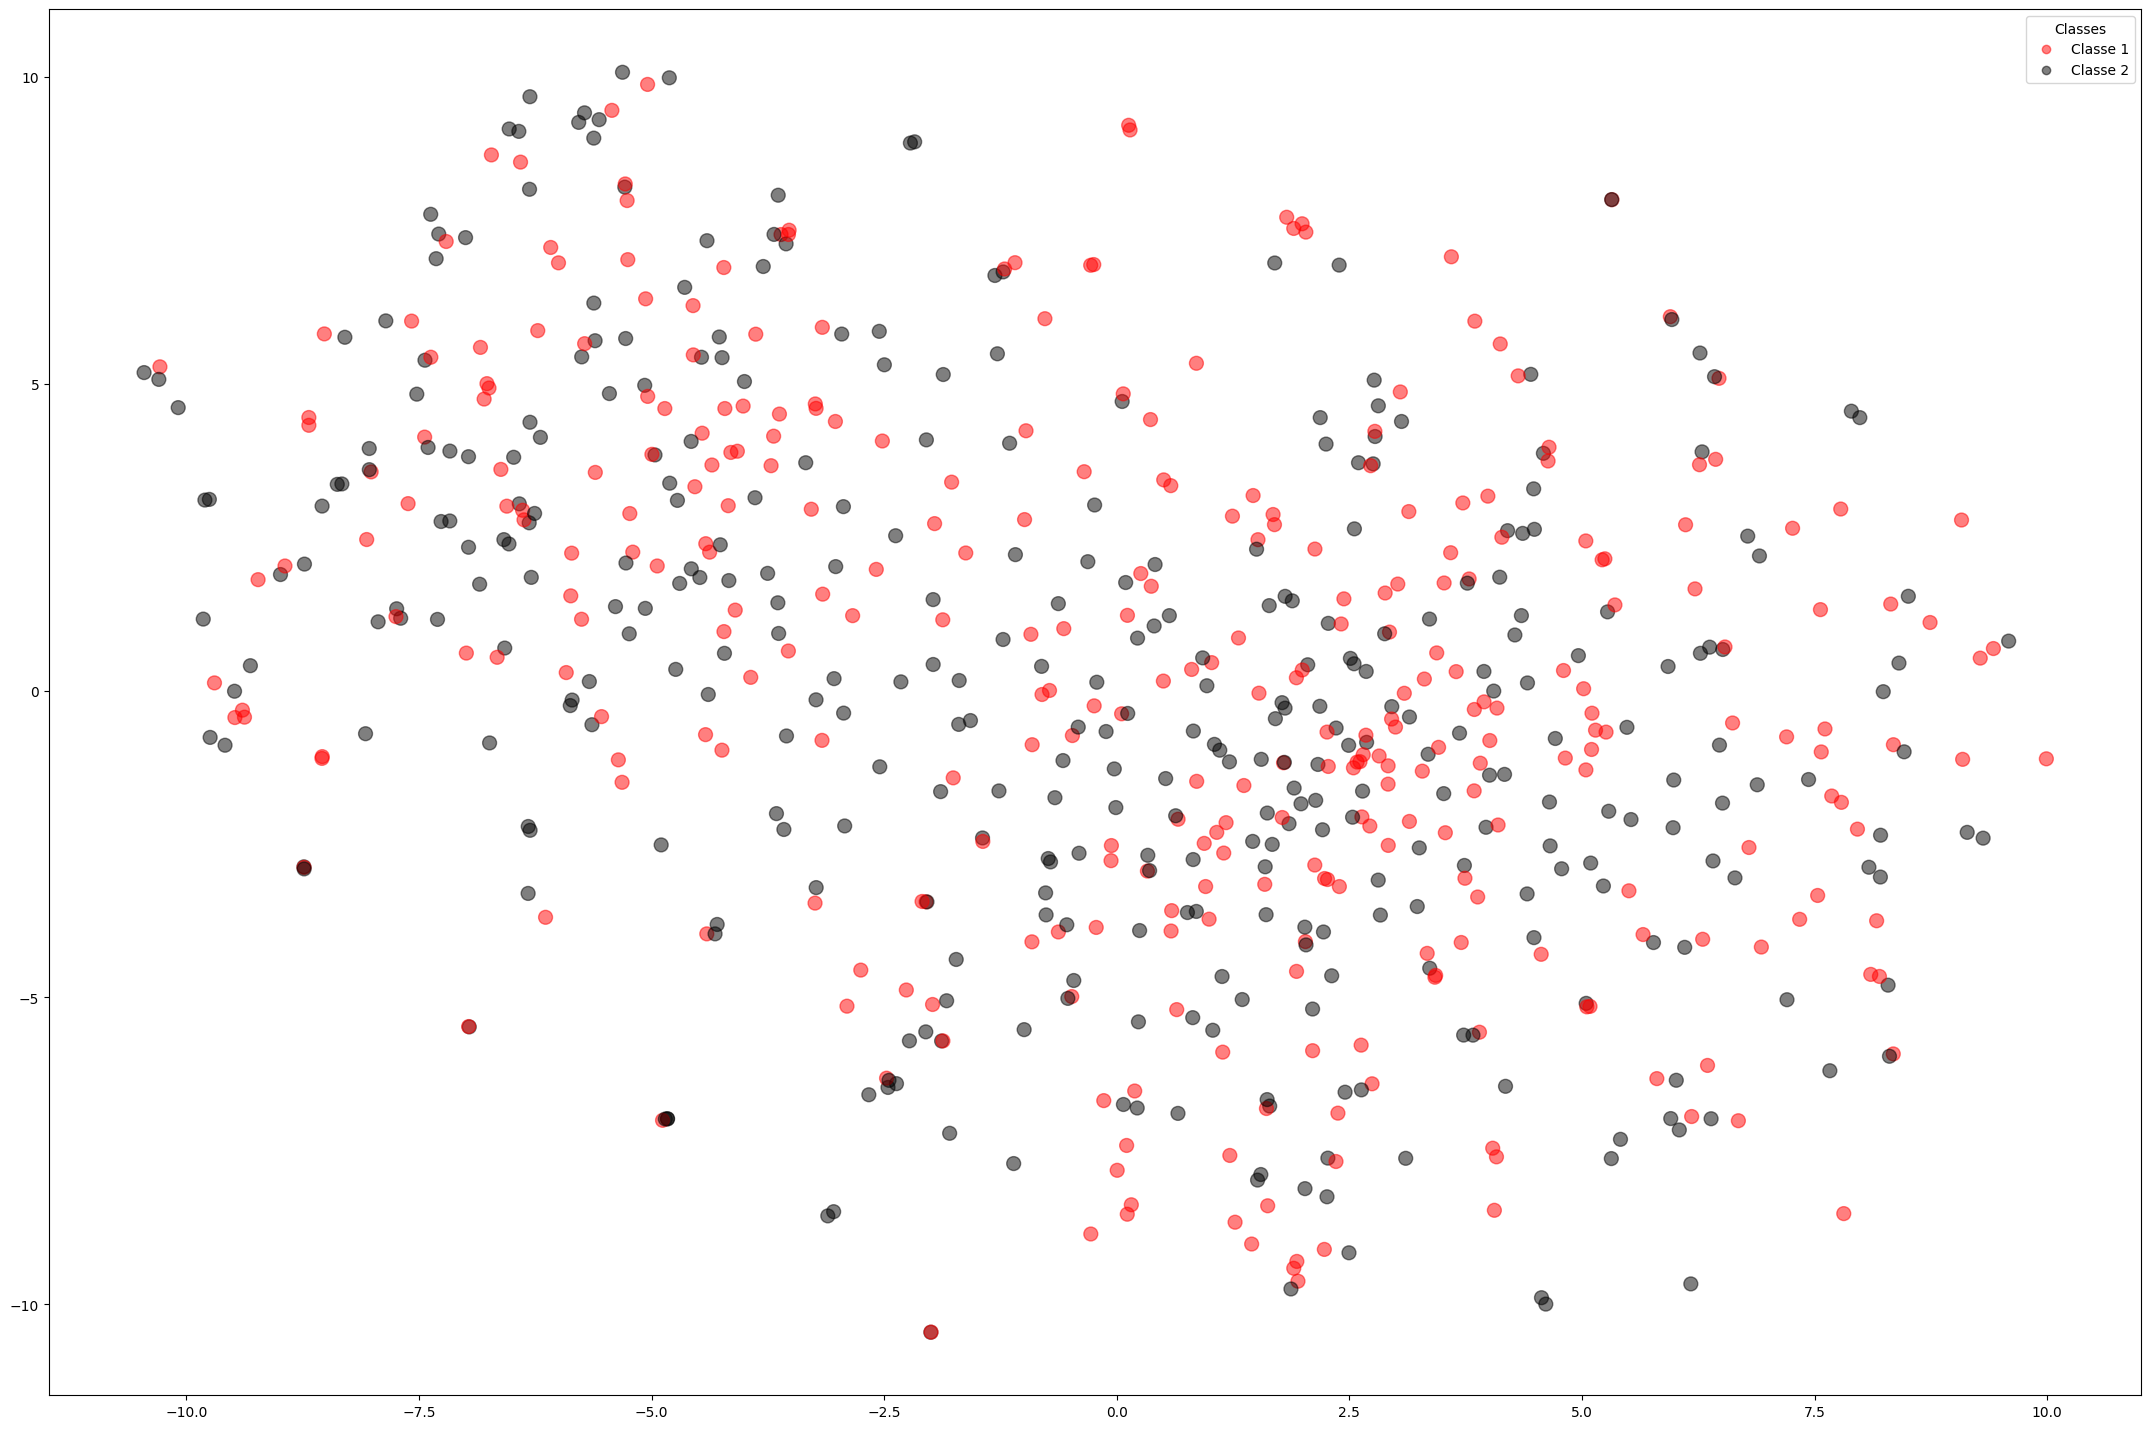

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm
import matplotlib.pyplot as plt
classe = df_document['class'].values.tolist()
tsne = TSNE(n_components = 2, perplexity = 50, init='random')
X_new = tsne.fit_transform(X/max_norm)
classe = np.array(classe)
c = ['green', 'red']
#classe = [c[i] for i in classe]
size = [100 for i in classe]
fig,ax = plt.subplots(figsize=(27, 18))
scatter = ax.scatter(X_new[:,0], X_new[:,1], c = classe, alpha=0.5,cmap=cm.flag, s=size)
componentes = ['Classe 1', 'Classe 2']
ax.legend(handles=scatter.legend_elements()[0], labels=componentes,
           title="Classes")
plt.show()

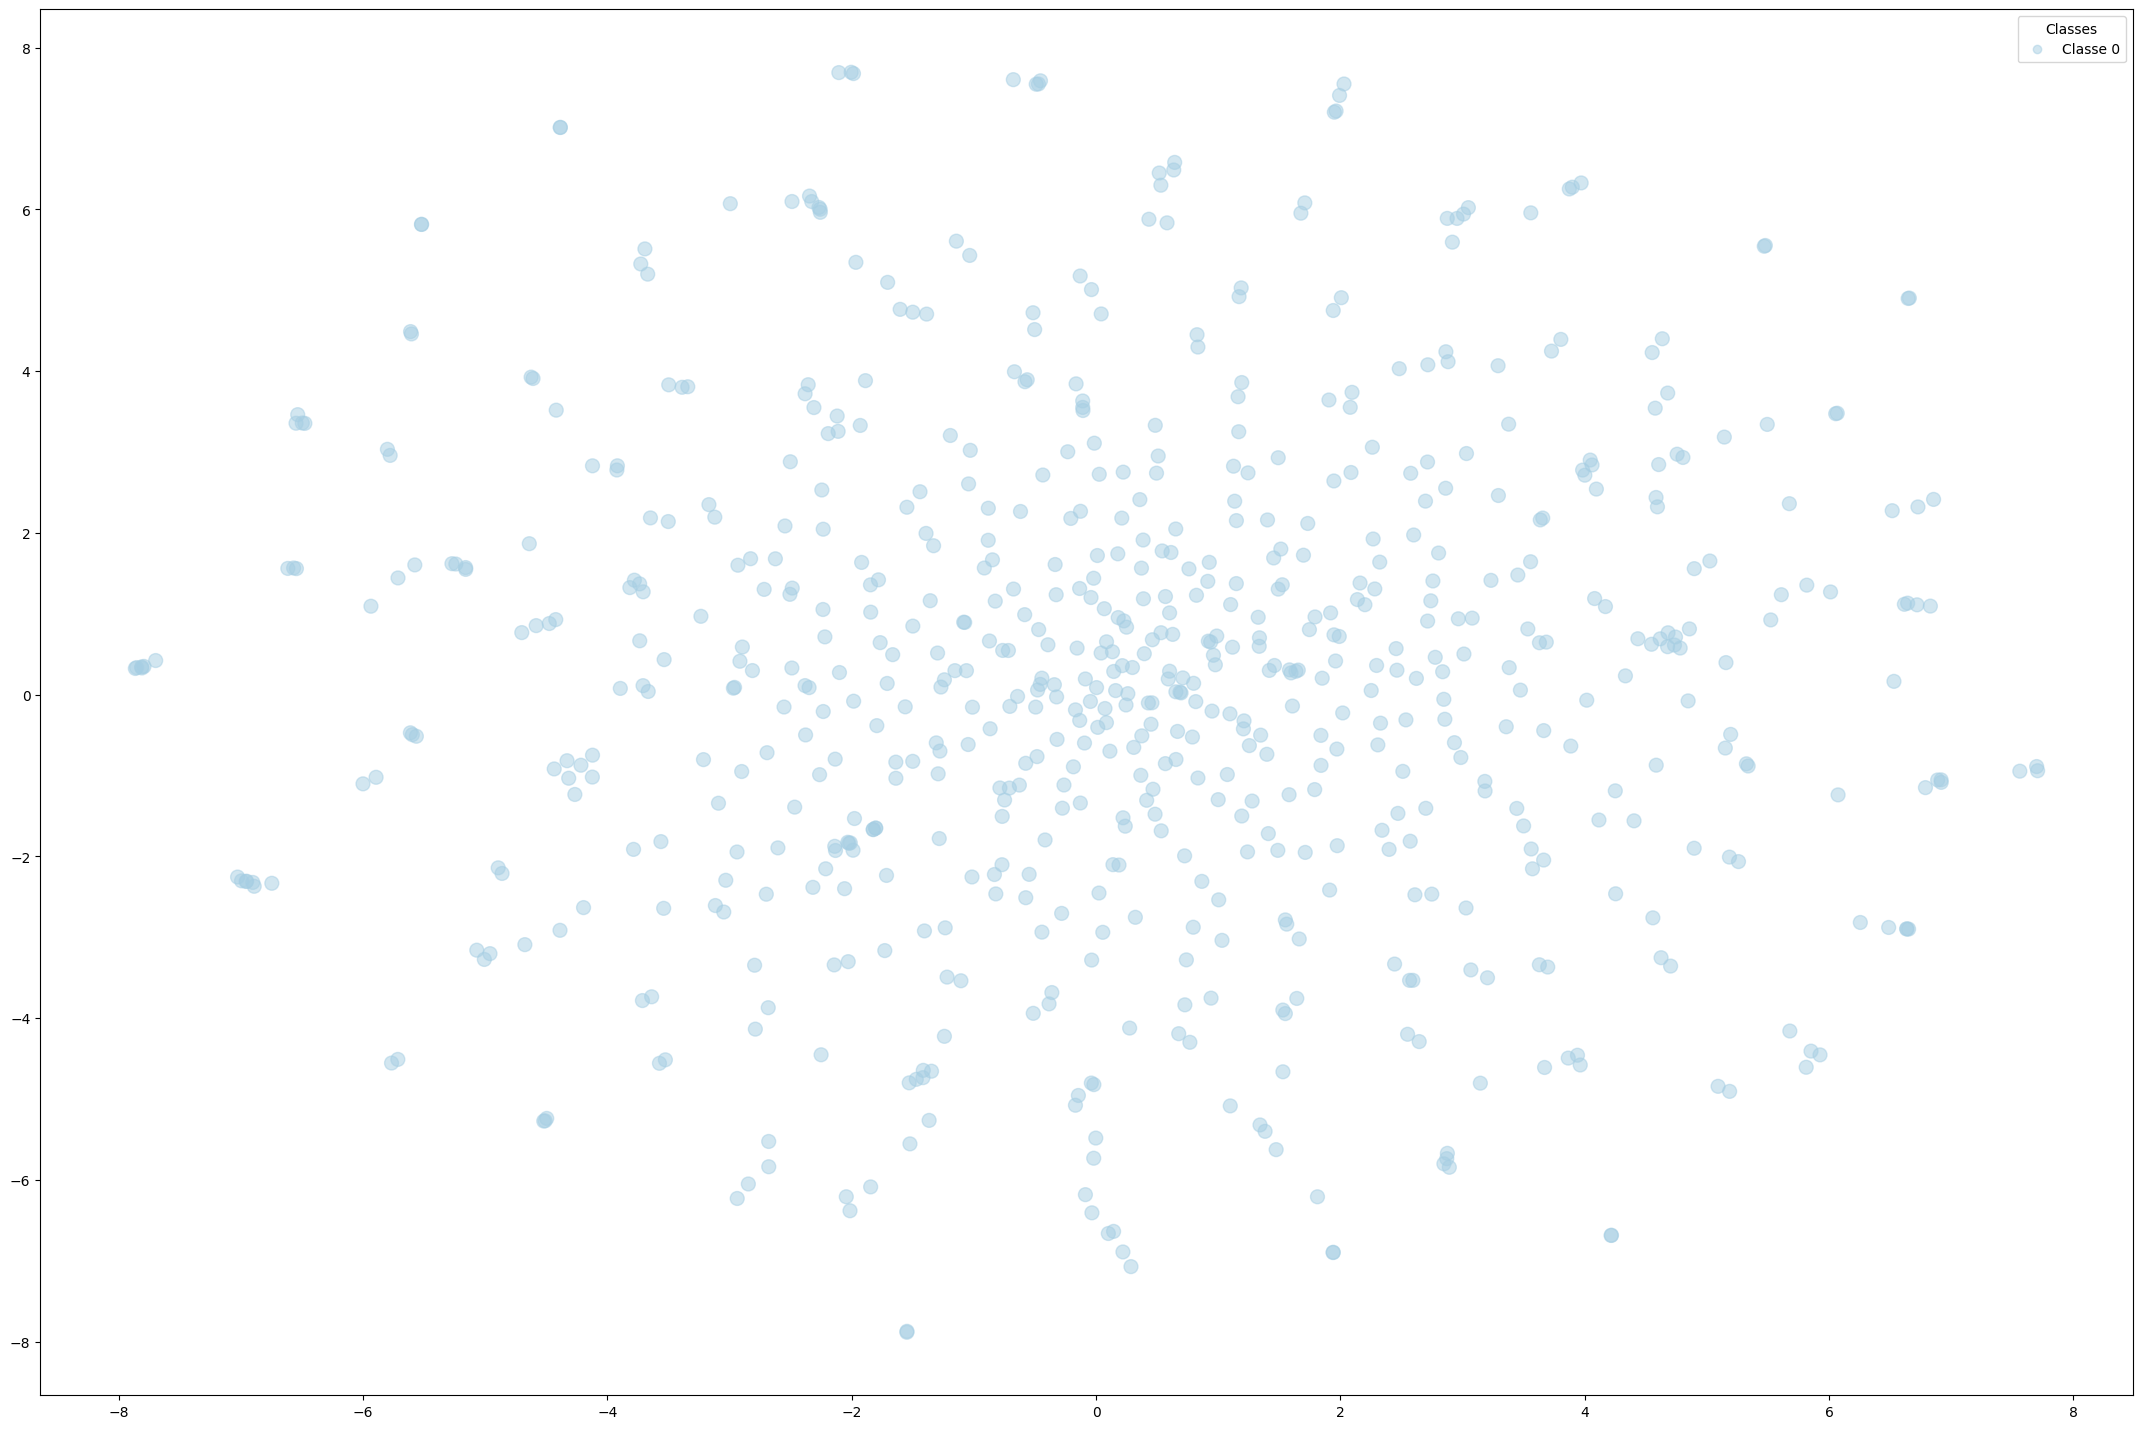

In [ ]:
tsne = TSNE(n_components = 2, perplexity = 50, init='random')
X2 = np.transpose(X)
X_new = tsne.fit_transform(X2/max_norm)
co = np.zeros(X.shape[1])

for i in range(X.shape[1]):
  zro = [0,0]
  for j in range(X.shape[0]):
    if X[j,i] > 0:
     zro[classe[j]]+=1

  res = zro[1]/(zro[0]+zro[1]+0.00001)
  if res > 0.8:
    co[i] = 3
  else:
    if res < 0.2:
      co[i] = 1
    else:
      co[i] = 2


#classe = np.array(classe)
c = ['green', 'red']
#classe = [c[i] for i in classe]
size = [100 for i in range(X2.shape[0])]
fig,ax = plt.subplots(figsize=(27, 18))
scatter = ax.scatter(X_new[:,0], X_new[:,1], c = co, alpha=0.5,cmap=cm.Paired, s=size)
componentes = ['Classe 0', 'Classe neutra', 'Classe 1']
ax.legend(handles=scatter.legend_elements()[0],labels=componentes,
           title="Classes")
plt.show()

### Treina um modelo SVM e imprime o resultado de classificação

In [ ]:
from sklearn import linear_model, svm
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, f1_score, precision_score
from sklearn.model_selection import GridSearchCV
X = VSM.transform(X_train).toarray()   ## Gera embbedding do conjunto de treinamento
#X = X/max_norm
#X = X - np.mean(X_aux)
X_test1 = VSM.transform(X_test).toarray()
#X_test1 = X_test1/max_norm
#X_test1 = X_test1 - np.mean(X_aux)
y_train = np.array(y_train) #converte para o formato numpy
y_test = np.array(y_test)  # converte para o formato numpy
svm_model = svm.SVC(probability=True)  ## Cria o modelo svm
svm_model.fit(X, y_train)  ## treina o modelo SVM com o conjunto de treinamento
y_pred = svm_model.predict(X_test1) ## classifica exemplos de teste e gera o resultado com valores entre 0 e 1
y_pred2 = svm_model.predict_proba(X_test1)
y_pred[y_pred<0.5] = 0
y_pred[y_pred>=0.5] = 1
print("Accuracy score = ",accuracy_score(y_test, y_pred))  ## acuracia  = (TP+TN)/(TP+TN+FP+FN)
print("Precision = ", precision_score(y_test, y_pred))
print("Cohen Kappa = ",cohen_kappa_score(y_test, y_pred))
print("f1 score macro = ",f1_score(y_test, y_pred, average='macro'))
print("f1 score micro = ",f1_score(y_test, y_pred, average='micro'))
print("Confusion matrix")
print( confusion_matrix(y_test, y_pred))
svm_model.get_params()

Accuracy score =  0.8011695906432749
Precision =  0.8048780487804879
Cohen Kappa =  0.6020533880903491
f1 score macro =  0.800999452354874
f1 score micro =  0.8011695906432749
Confusion matrix
[[71 16]
 [18 66]]


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
erros = []
for i in range(y_pred2.shape[0]):
  if (y_pred[i]!=y_test[i]):
    erros.append([ID_test[i], X_test[i], y_pred2[i], y_test[i]])
df_erros = pd.DataFrame(erros, columns=['ID','text', 'predicted', 'target'])
df_erros

,ID,text,predicted,target
0,WOS:000725517900002,the objective of this study was to identify by...,"[0.4460955934024809, 0.5539044065975192]",0
1,WOS:000254597700017,in tropical forest areas with highly weathered...,"[0.5532083502203113, 0.44679164977968877]",1
2,WOS:000457820000013,brazilian environmental legislation provides p...,"[0.7491706421828196, 0.2508293578171806]",1
3,WOS:A1997XP11900013,the soil under intensive cultivation and low a...,"[0.08350233693102643, 0.9164976630689736]",0
4,WOS:000415368000001,the objective of this study was to evaluate th...,"[0.5370796123459234, 0.46292038765407656]",1
5,WOS:000615883600004,"in the eastern amazon, abandoned and unproduct...","[0.21095434264267363, 0.7890456573573262]",0
6,WOS:000353075000009,"traditionally, cereal crop harvest residues ar...","[0.6352730900117736, 0.36472690998822654]",1
7,WOS:000326470500001,in this paper we calculated soil carbon stocks...,"[0.5, 0.5]",1
8,WOS:000260902600006,the soil management may influence soil hydro-p...,"[0.1389601076593219, 0.861039892340678]",0
9,WOS:000580938500026,conversion of grasslands to agriculture has pr...,"[0.464125749420497, 0.5358742505795031]",0


Classificação usando SVM com os parâmetros otimizados por grid-search

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
grid.fit(X,y_train)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test1)
grid_predictions[grid_predictions<0.5] = 0
grid_predictions[grid_predictions>=0.5] = 1

print("Accuracy score = ",accuracy_score(y_test, grid_predictions))  ## acuracia  = (TP+TN)/(TP+TN+FP+FN)
print("Precision = ", precision_score(y_test, grid_predictions))
print("Cohen Kappa = ",cohen_kappa_score(y_test, grid_predictions))
print("f1 score macro = ",f1_score(y_test, grid_predictions, average='macro'))
print("f1 score micro = ",f1_score(y_test, grid_predictions, average='micro'))
print("Confusion matrix")
print( confusion_matrix(y_test, grid_predictions))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=0.01